# TIFF files
This dataset consists of a kind of image format
http://files.ntsg.umt.edu/data/LPDR_v2/GeoTIFF/



In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
path = r"..\data\raw\AMSRU_Mland_2017001A.tif"


In [28]:
# Load the data into RAM
with rasterio.open(path) as image:
    image_array = image.read()

image_array.shape
# 7 freq bands or other

(7, 586, 1383)

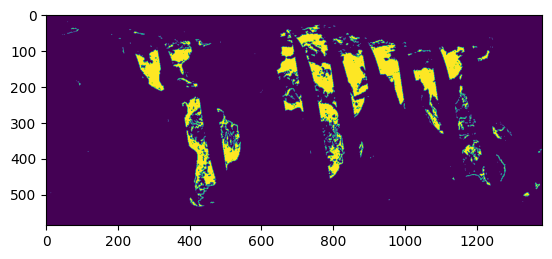

In [17]:
# Plot data array
import matplotlib.pyplot as plt
plt.imshow(image_array[0,:,:])

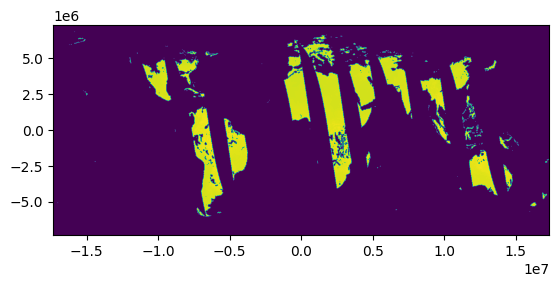

<Axes: >

In [31]:
# With a data reader instead of loading the array into memory
ds = rasterio.open(path)
show((ds,4), cmap = "viridis")

In [86]:
# Load a land mask and plot both datasets
import sys
sys.path.append("../")

from src.processing import create_landmask
lat_step = 180/image_array.shape[1]
lon_step = 360/image_array.shape[2]
lats = np.arange(-90, 90, lat_step)
lons = np.arange(0,360, lon_step)
lons = [(lon - 180)%360 for lon in lons]

landmask = create_landmask(lat=lats, lon=lons)

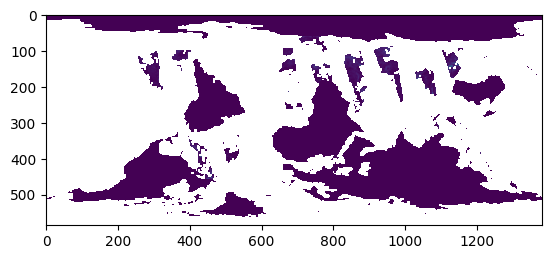

In [98]:
plt.imshow(image_array[0,:,:])
plt.imshow(landmask.values[:])

C:\Users\andre\AppData\Local\Temp\ipykernel_13588\1572144006.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


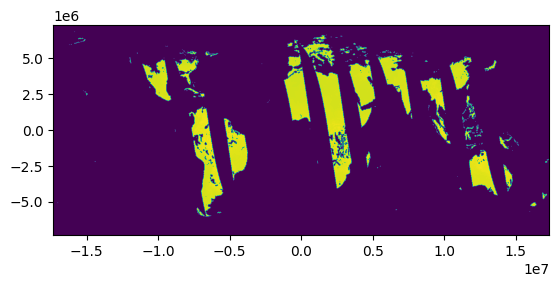

In [100]:
fig, ax = plt.subplots()
ds = rasterio.open(path)
show((ds,4), cmap = "viridis", ax=ax)

# landmask.plot(ax=ax)

fig.show()


### Notes:
No metadata in the files themselves
They had to design arround this so the dataset is very consistent across products and time periods.



In [99]:
1666.42*14

23329.88